# Aprendizado Não Supervisionado

Nome: Ricardo Coutinho Cordeiro

Professor: Ulisses Brisolara Corrêa


##Importações básicas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Visualizar Dataset Iris

In [ ]:
data = datasets.load_iris()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

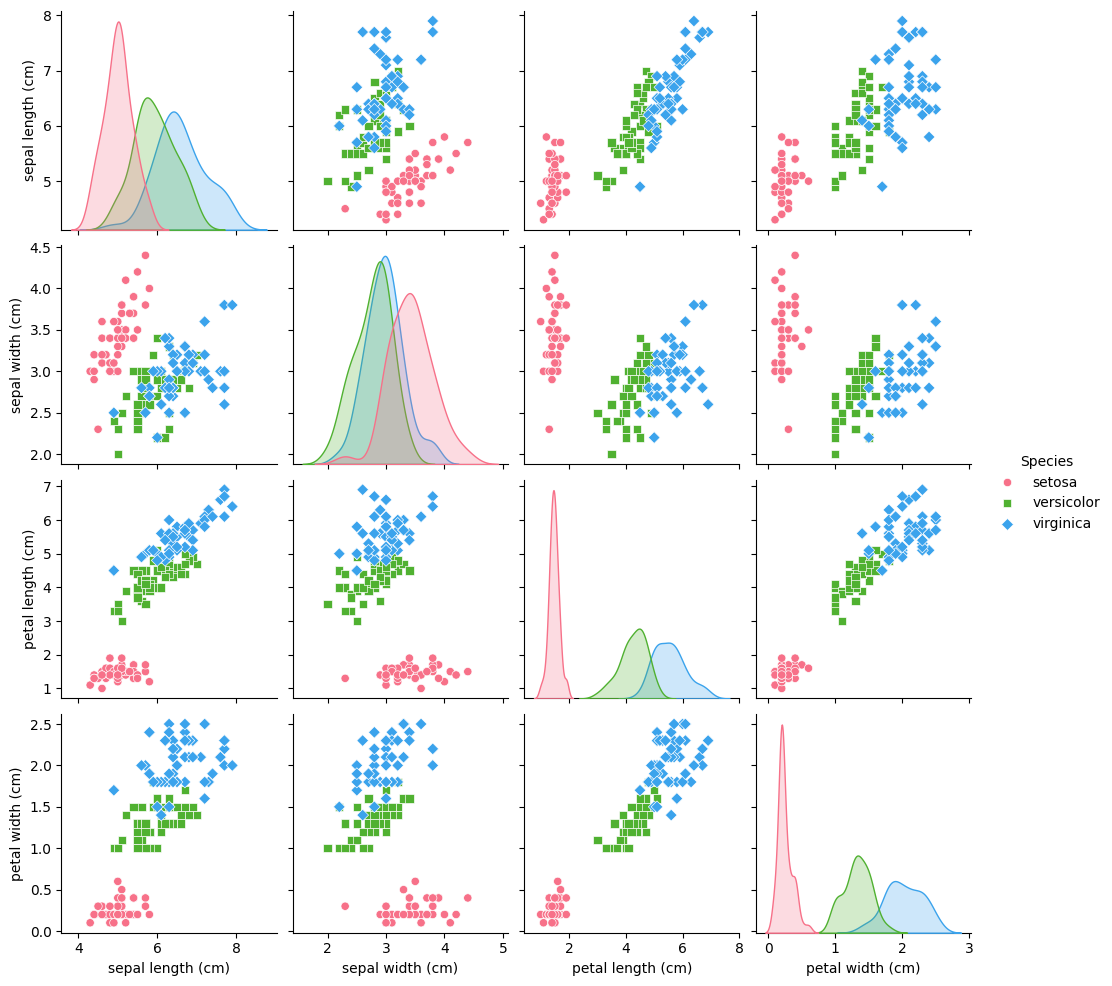

In [ ]:
iris = X.copy()
iris['Species'] = data.target_names[y]
sns.pairplot(iris, hue="Species", palette="husl", markers=["o", "s", "D"])

#Redução Dimensional

Árvore de decisão sem limite de profundidade

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.93333


Aplicando árvore de decisão com duas camadas de profundidade

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


##PCA

Realizando a redução dimensional de 4 atributos para 2 atributos utilizando PCA e aplicando árvore de decisão

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


Como podemos observar, ao aplicar PCA nos dados obtivemos um resultado melhor do que sem o tratamento para a mesma profundidade, partindo de uma acurácia de 88% para 91%. Entretanto, é possível observar que se utilizarmos os dados originais nesse problema somos capazes de obter um resultado melhor, porém necessitando de maior gasto computacional por termos uma árvore mais profunda.

##LDA

Realizando a redução dimensional de 4 atributos para 2 atributos utilizando LDA e aplicando árvore de decisão

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.95556


##Gráficos

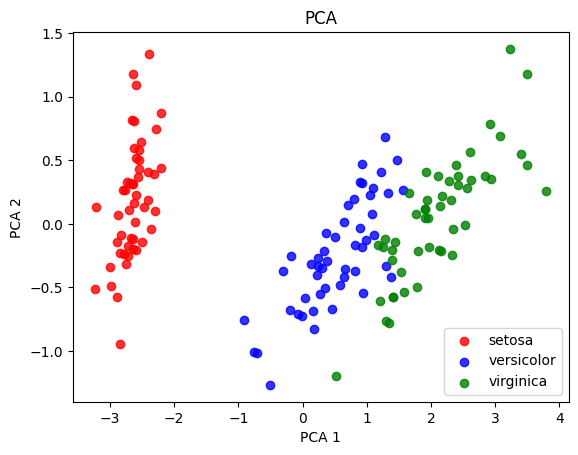

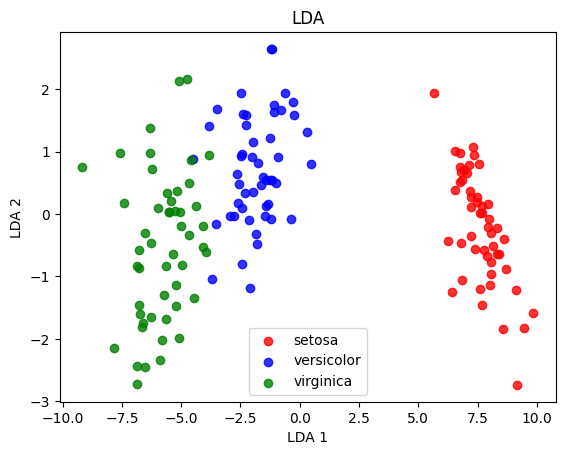

In [ ]:
target_names = ['setosa', 'versicolor', 'virginica']

dim_reduction_methods = [("PCA", pca), ("LDA", lda)]
colors = ['red', 'blue', 'green']

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    model.fit(X, y)
    X_embedded = model.transform(X)
    for color, target_name in zip(colors, target_names):
        plt.scatter(X_embedded[y == target_names.index(target_name), 0],
                    X_embedded[y == target_names.index(target_name), 1],
                    alpha=0.8,
                    color=color,
                    label=target_name)
    plt.title(name)
    plt.xlabel(f"{name} 1")
    plt.ylabel(f"{name} 2")
    plt.legend(loc='best')
    plt.show()

#Agrupamentos

##K-means
(não confundir com KNN)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


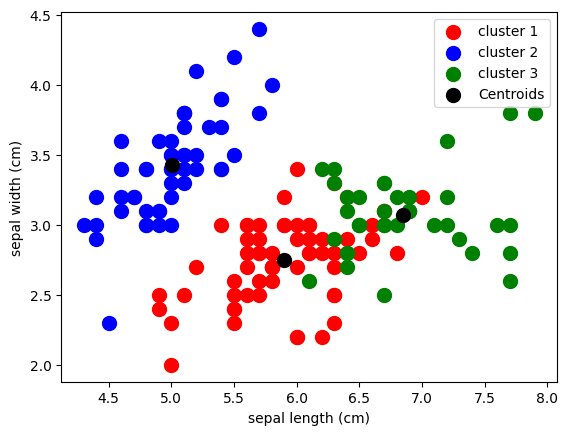

In [ ]:
cluster_1 = X.loc[y_kmeans == 0]
cluster_2 = X.loc[y_kmeans == 1]
cluster_3 = X.loc[y_kmeans == 2]
plt.scatter(cluster_1[X.columns[0]], cluster_1[X.columns[1]],s = 100, c = 'red', label = 'cluster 1')
plt.scatter(cluster_2[X.columns[0]], cluster_2[X.columns[1]],s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(cluster_3[X.columns[0]],cluster_3[X.columns[1]],s = 100, c = 'green', label = 'cluster 3')
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.xlabel(f"{data.feature_names[0]}")
plt.ylabel(f"{data.feature_names[1]}")
plt.legend()
plt.show()

##K-prototypes

In [ ]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

Inclusão de um atributo categorico ao dataset, visando a exemplificação do k-prototypes.

In [ ]:
bins = [0, 2.5, 5, 10]  # Definindo os intervalos
labels = ['Curto', 'Médio', 'Longo']

X_kp = X.copy()

# Criar a coluna categórica baseada no comprimento das pétalas
X_kp['categoria_comprimento_pétala'] = pd.cut(X_kp['petal length (cm)'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Converter a coluna categórica para códigos numéricos
X_kp['categoria_comprimento_pétala'] = X_kp['categoria_comprimento_pétala'].cat.codes

categorical_columns = [4]

# Aplicar K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42)
clusters = kproto.fit_predict(X_kp, categorical=categorical_columns)

# Adicionar os rótulos dos clusters ao DataFrame original
X_kp['cluster'] = clusters

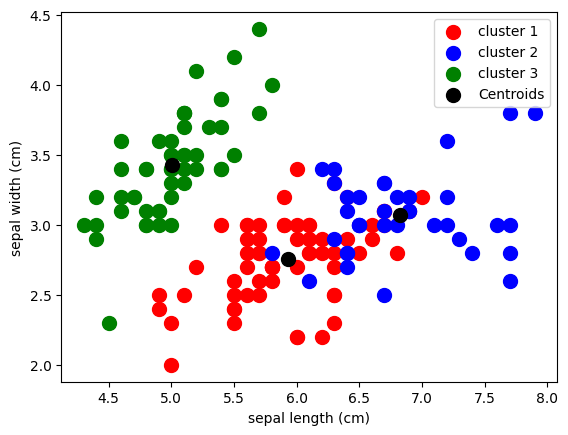

In [ ]:
cluster_1 = X_kp.loc[X_kp['cluster'] == 0]
cluster_2 = X_kp.loc[X_kp['cluster'] == 1]
cluster_3 = X_kp.loc[X_kp['cluster'] == 2]

plt.scatter(cluster_1[X_kp.columns[0]], cluster_1[X_kp.columns[1]],s = 100, c = 'red', label = 'cluster 1')
plt.scatter(cluster_2[X_kp.columns[0]], cluster_2[X_kp.columns[1]],s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(cluster_3[X_kp.columns[0]],cluster_3[X_kp.columns[1]],s = 100, c = 'green', label = 'cluster 3')

centers = kproto.cluster_centroids_
centers_num = centers[:, :4].astype(float)
plt.scatter(centers_num[:, 0], centers_num[:, 1], s=100, c='black', label='Centroids')


plt.xlabel(f"{data.feature_names[0]}")
plt.ylabel(f"{data.feature_names[1]}")


plt.legend()
plt.show()

#Tarefa

Para testar suas habilidades, aplique os conhecimentos discutidos no conjunto de dados disponibilizado a seguir.

Além disso, pesquise sobre como escolher o número apropriado de clusters para melhor solucionar o problema proposto. Duas técnicas comumente utilizadas para isso são o **elbow method** e o **silhouette coefficient**. Aplique elas e explique sua escolha.

Material de apoio:


*  https://realpython.com/k-means-clustering-python/



## Baixar dataset para a tarefa

In [ ]:
!pip install gdown -qqq

In [ ]:
!gdown https://drive.google.com/uc?id=1JksaGHv9sXbodEzKaBx8HLfNKp1bsONZ

Downloading...
From: https://drive.google.com/uc?id=1JksaGHv9sXbodEzKaBx8HLfNKp1bsONZ
To: /content/dados.csv
100% 96.3k/96.3k [00:00<00:00, 5.81MB/s]


In [ ]:
data_path = "dados.csv"
df = pd.read_csv(data_path)

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,-7.575234,-4.876644,1.325981,0.031373,-3.000134,3
1,5.827592,-7.281017,0.664239,2.964538,-7.562944,5
2,3.341129,-7.052864,-4.150896,-2.274314,-1.706998,4
3,3.002374,-6.716980,-8.936703,9.210582,10.033413,6
4,-4.829935,8.784407,5.268019,3.243295,-7.698101,0


## Visualizar Dados

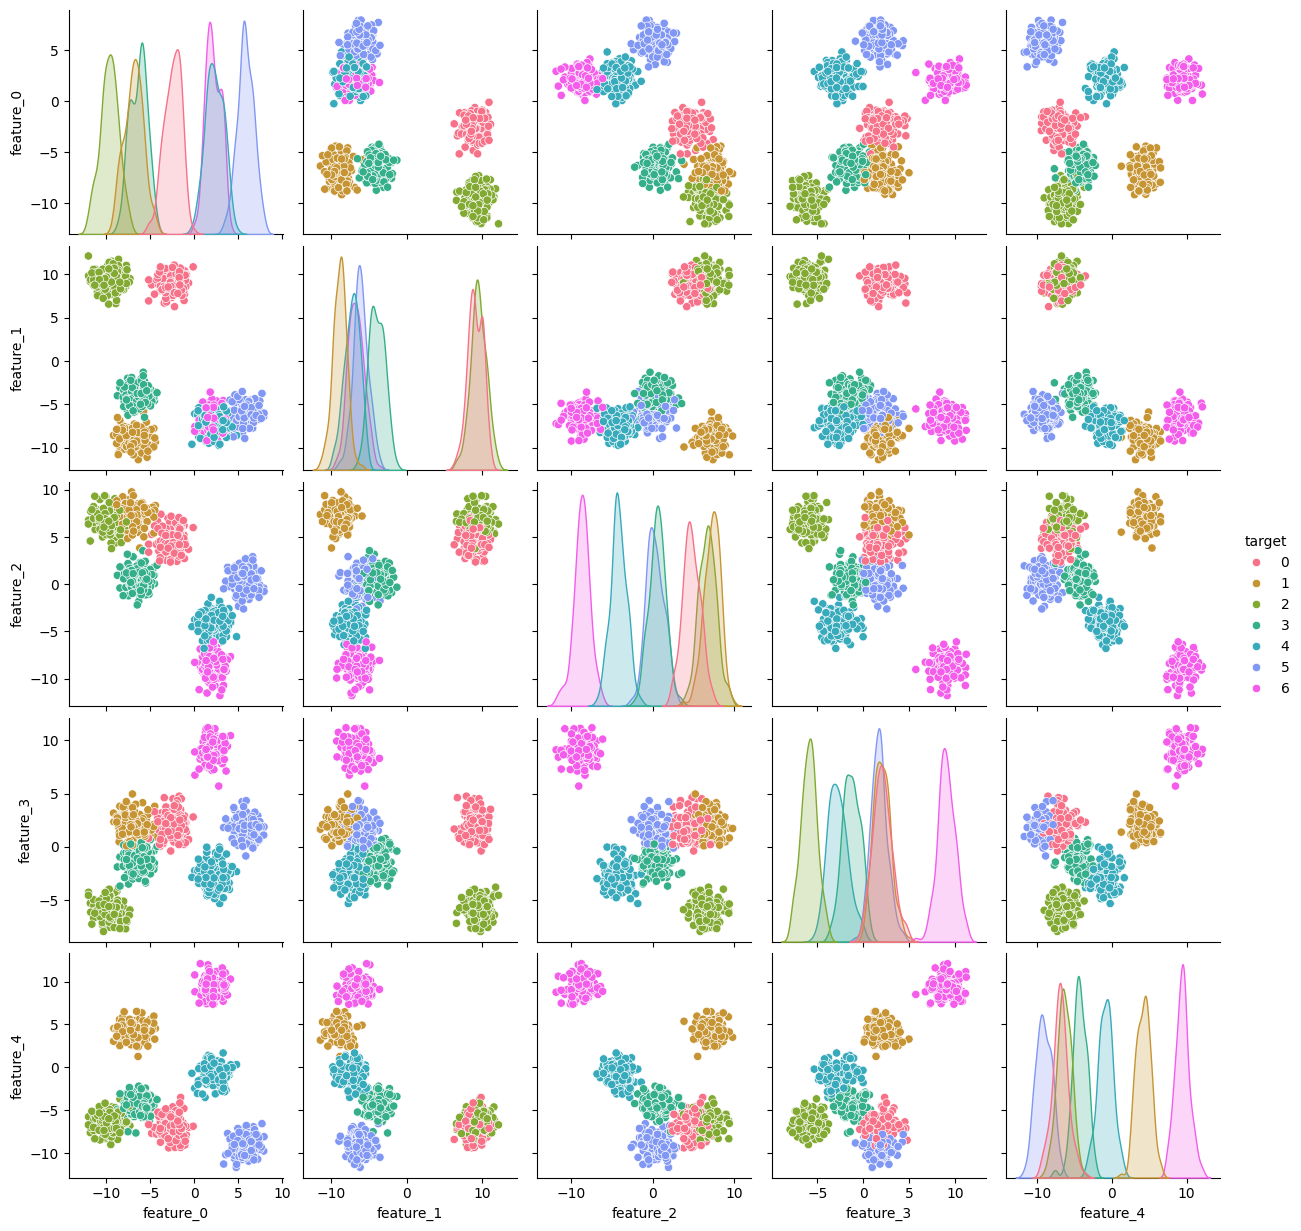

In [ ]:
paleta = sns.color_palette("husl", len(df['target'].unique()))
sns.pairplot(df, diag_kind='kde', hue='target', palette=paleta)
plt.show()

## Pré-processamento

In [ ]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
print("Colunas categóricas:", colunas_categoricas)

# verifica se existem colunas categoricas
if 'feature1' in df.columns:
    df['categoria_feature1'] = pd.cut(df['feature1'], bins=bins, labels=labels, include_lowest=True)
    df['categoria_feature1'] = df['categoria_feature1'].cat.codes
    colunas_categoricas = ['categoria_feature1']
else:
    colunas_categoricas = []

for col in colunas_categoricas:
    df[col] = df[col].astype('category').cat.codes

print(df.head())
print(df.info())

Colunas categóricas: Index([], dtype='object')
   feature_0  feature_1  feature_2  feature_3  feature_4  target
0  -7.575234  -4.876644   1.325981   0.031373  -3.000134       3
1   5.827592  -7.281017   0.664239   2.964538  -7.562944       5
2   3.341129  -7.052864  -4.150896  -2.274314  -1.706998       4
3   3.002374  -6.716980  -8.936703   9.210582  10.033413       6
4  -4.829935   8.784407   5.268019   3.243295  -7.698101       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   target     1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB
None


## PCA

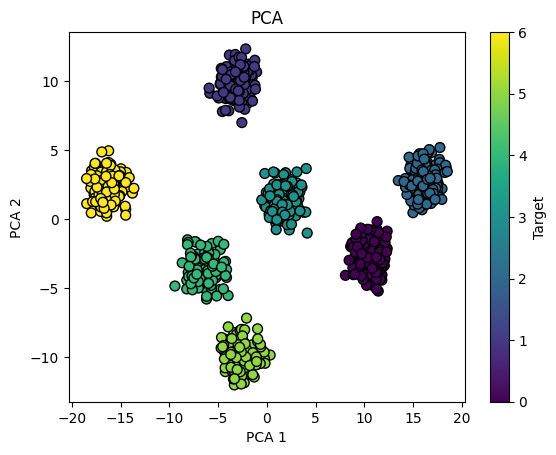

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Target')
plt.show()

## LDA

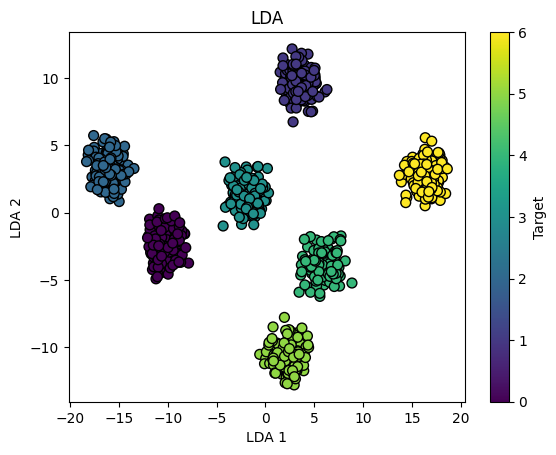

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.colorbar(label='Target')
plt.show()

## Elbow Method

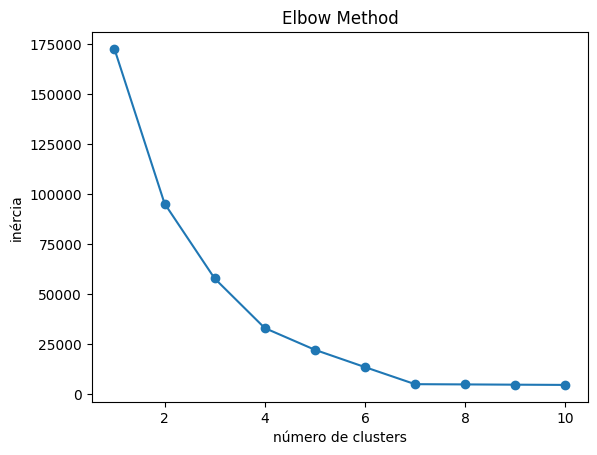

In [ ]:
from sklearn.cluster import KMeans

inercia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=100, n_init=10, random_state=42)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('número de clusters')
plt.ylabel('inércia')
plt.title('Elbow Method')
plt.show()

## Silhouette Coefficient

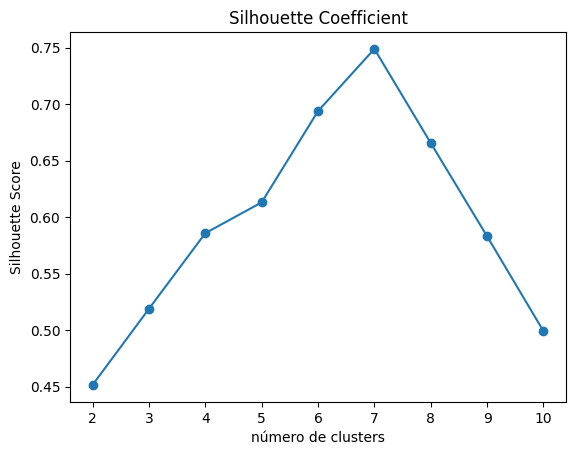

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=100, n_init=10, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient')
plt.show()